# Workflow for processing Lake Argyle Multi-timeline

In [1]:
import numpy as np
import sys, os
sys.path.append("../SRC")

import time
start_time = time.time()

import datetime


#
# Define corners of field data.
# Order is SE, SW, NE, NW. Units are decimal degrees.
#
Corners = [-16.102306, 128.771826, 
           -16.102306, 128.770826, 
           -16.101306, 128.771826, 
           -16.101306, 128.770826] 

#
# Set up output directory
#
output = '../PNGS/TMP/'

#
# field_data is in the format: 'Field Site Name', 'Date'
#
field_data = ['ARG', '22APR18', '', 'Sentinel2a', 'UA_Panel', 'Radiance']

#
# CSV files with field site data (if available)
#
ls8_csvs = []
sent_csvs = []


#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 0.6, 0.0, 0.6]

In [2]:
import shutil

import matplotlib.pyplot as plt
import matplotlib

import datacube

from Site_Pipelines import *
from Multi_TimeLine import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib inline
matplotlib.rcParams.update({'font.size': 11})
matplotlib.rcParams['savefig.dpi'] = 300

#
# Remove old files in directory and create a new one
#
directory = os.path.dirname(output)
if os.path.exists(directory):
    shutil.rmtree(directory)
os.makedirs(directory)

In [3]:
#
# Use coordinates to source data on nearest operational rain gauge from the BoM
#
rain_dat = GetRainData.get_rain_data(Corners[0], Corners[1])

Nearest Rain Gauge Station -  23.91 km away

-------------------------------------------

         ID      Lat       Lon                            Name
1363  14853 -15.9699  129.0408  KEEP RIVER RANGERS            


In [4]:
#
# Colours used for plotting multi-coloured Lines
#
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Start Figure numbering at 1
#
fignum = 1

### Create DataFrames with GPS locations

In [5]:
import pandas as pd

def mkdf(Corners):
    temploc = pd.DataFrame([Corners[::2], Corners[1::2]], index=['Latitude', 'Longitude'])
    location = temploc.T.copy()
    return location

location = mkdf(Corners)

In [6]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:00:14 (h:m:s) to get this far


### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [7]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(location)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

In [8]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:15:39 (h:m:s) to get this far


# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

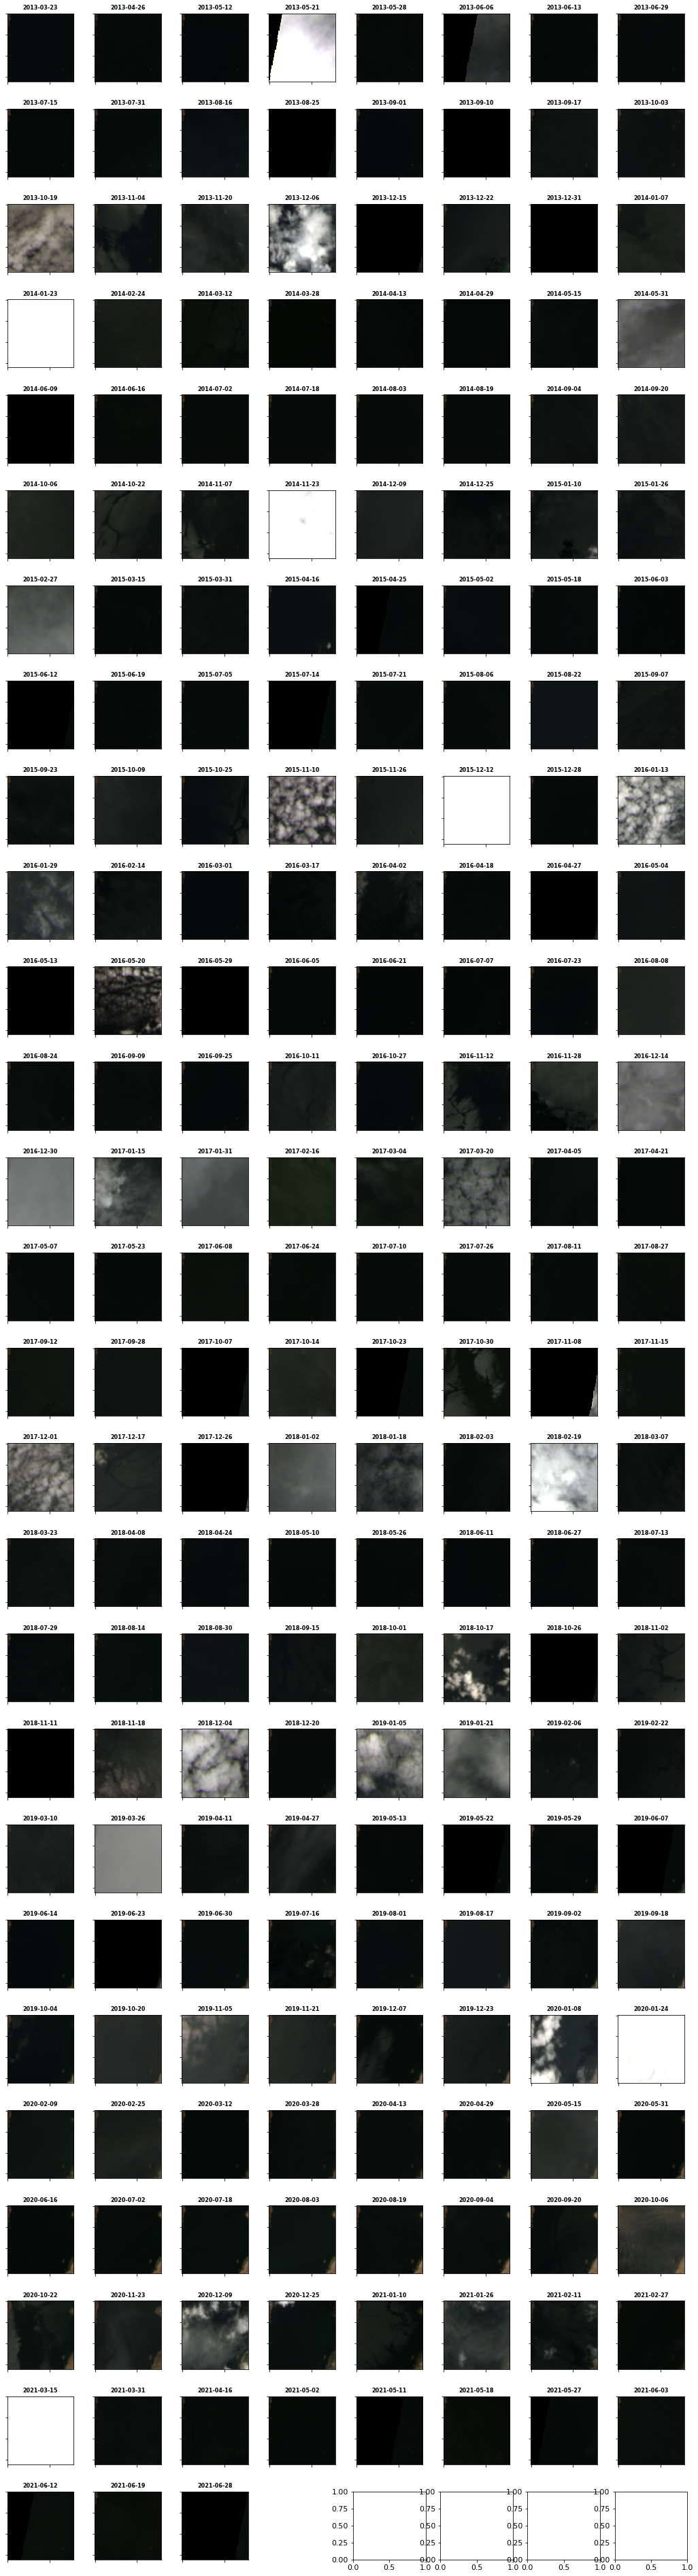

In [9]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_bigarray, output, field_data, fignum)
fignum += 1

In [10]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:16:22 (h:m:s) to get this far


Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

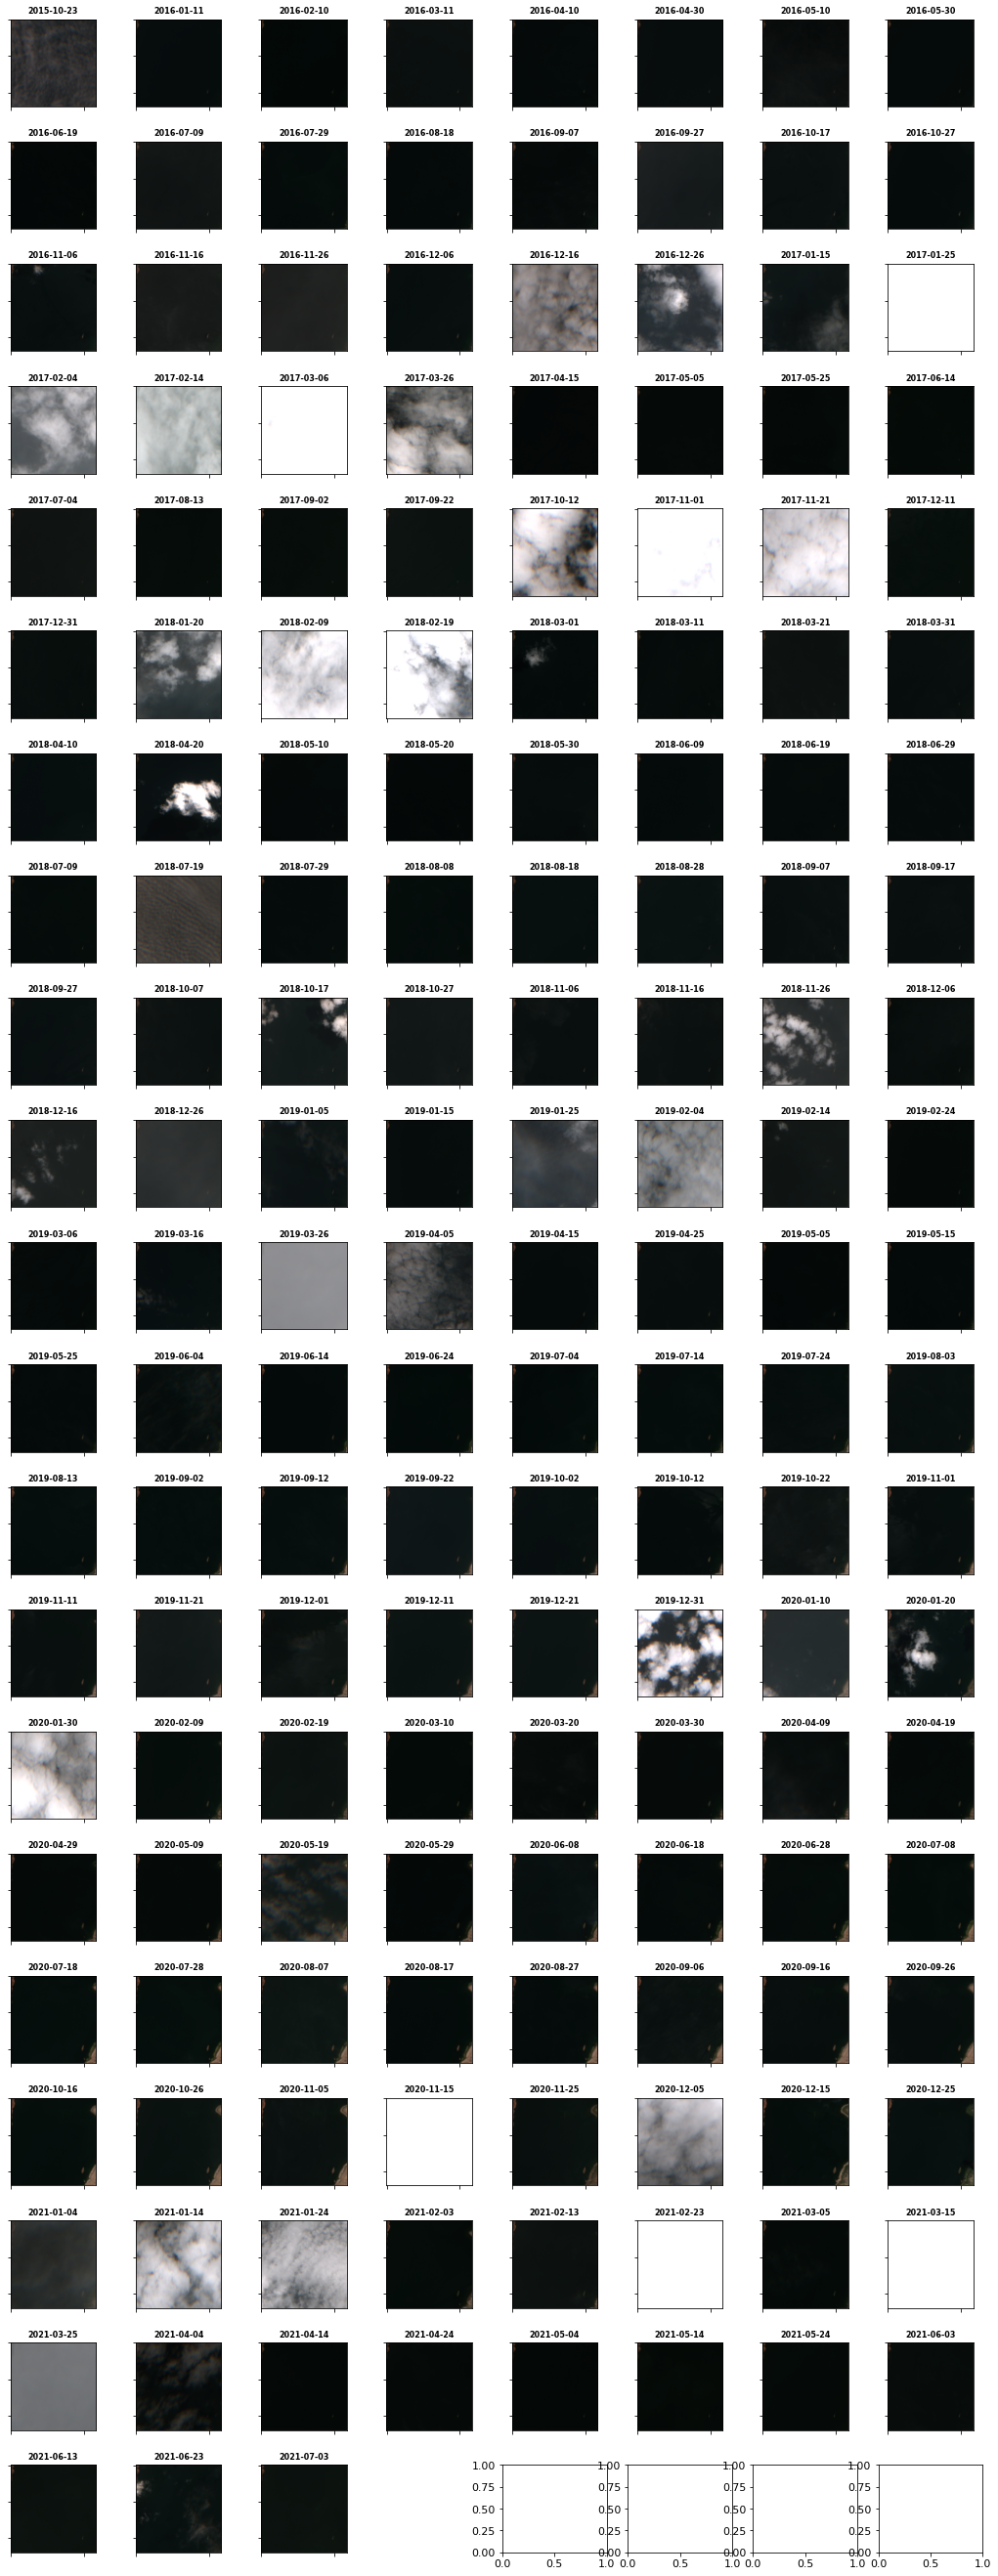

In [11]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_bigarray, output, field_data, fignum)
fignum += 1

In [12]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:17:00 (h:m:s) to get this far


Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

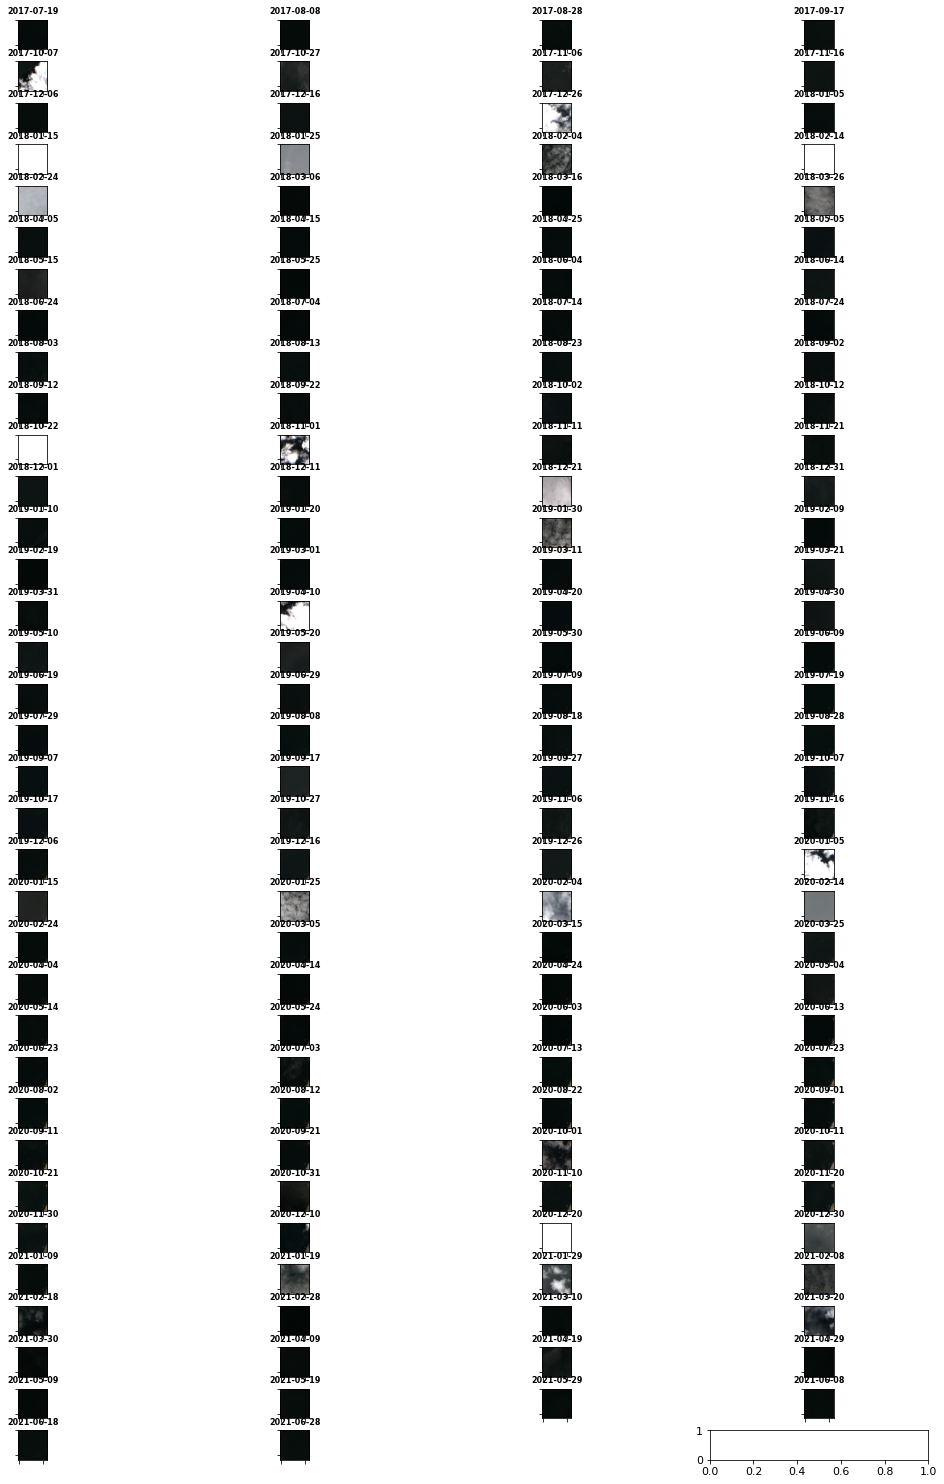

In [13]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_bigarray, output, field_data, fignum)
fignum += 1

### Mask out clouds, based on thresholding

In [14]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:17:26 (h:m:s) to get this far


In [15]:
ls8_daylist = CloudMask.cloud_mask(ls8_array, ls8_bigarray, 'LS8')
s2a_daylist = CloudMask.cloud_mask(s2a_array, s2a_bigarray, 'S2A')
s2b_daylist = CloudMask.cloud_mask(s2b_array, s2b_bigarray, 'S2B')

/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
/g/data/v10/public/modules/dea-env/20200713/lib/python3.6/site-packages/xarray/core/nputils.py:215: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Coarse threshold finds this many bad days: 54
Fine threshold finds this many bad days: 10
Removed  2013-08-25 as there are no good data over the field site for this day
Removed  2013-12-15 as there are no good data over the field site for this day
Removed  2014-06-09 as there are no good data over the field site for this day
Removed  2015-06-12 as there are no good data over the field site for this day
Removed  2016-04-27 as there are no good data over the field site for this day
Removed  2016-05-29 as there are no good data over the field site for this day
Removed  2017-10-07 as there are no good data over the field site for this day
Removed  2017-11-08 as there are no good data over the field site for this day
Removed  2017-12-26 as there are no good data over the field site for this day
Removed  2018-10-26 as there are no good data over the field site for this day
Removed  2019-05-22 as there are no good data over the field site for this day
Removed  2019-06-23 as there are no good 

### Create a statistics dataframe for satellite data

In [16]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:17:50 (h:m:s) to get this far


In [17]:
ls8_daylist.remove('2013-09-10')
ls8_daylist.remove('2013-12-31')
ls8_daylist.remove('2015-07-14')
ls8_daylist.remove('2016-05-13')
ls8_daylist.remove('2017-10-23')
ls8_daylist.remove('2018-11-11')
ls8_daylist.remove('2019-06-07')

In [18]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:17:50 (h:m:s) to get this far


In [19]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_daylist, s2a_daylist, s2b_daylist, 'dummy', 'dummy', field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

In [20]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:17:56 (h:m:s) to get this far


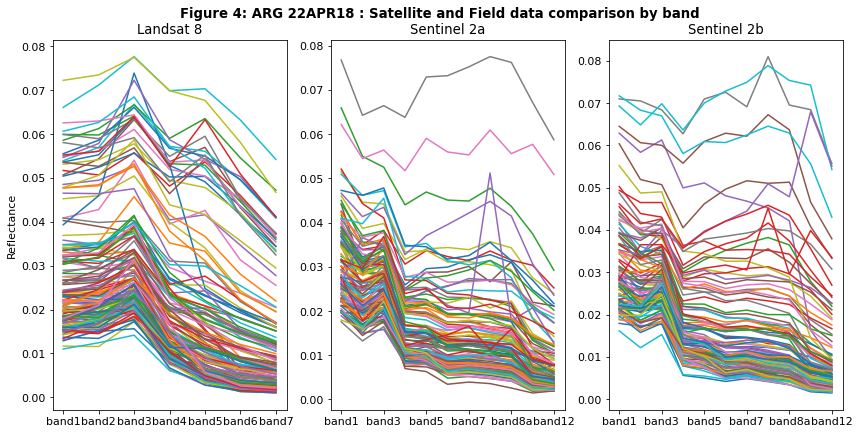

In [21]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

In [22]:
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to get this far")

This Notebook took  0:18:01 (h:m:s) to get this far


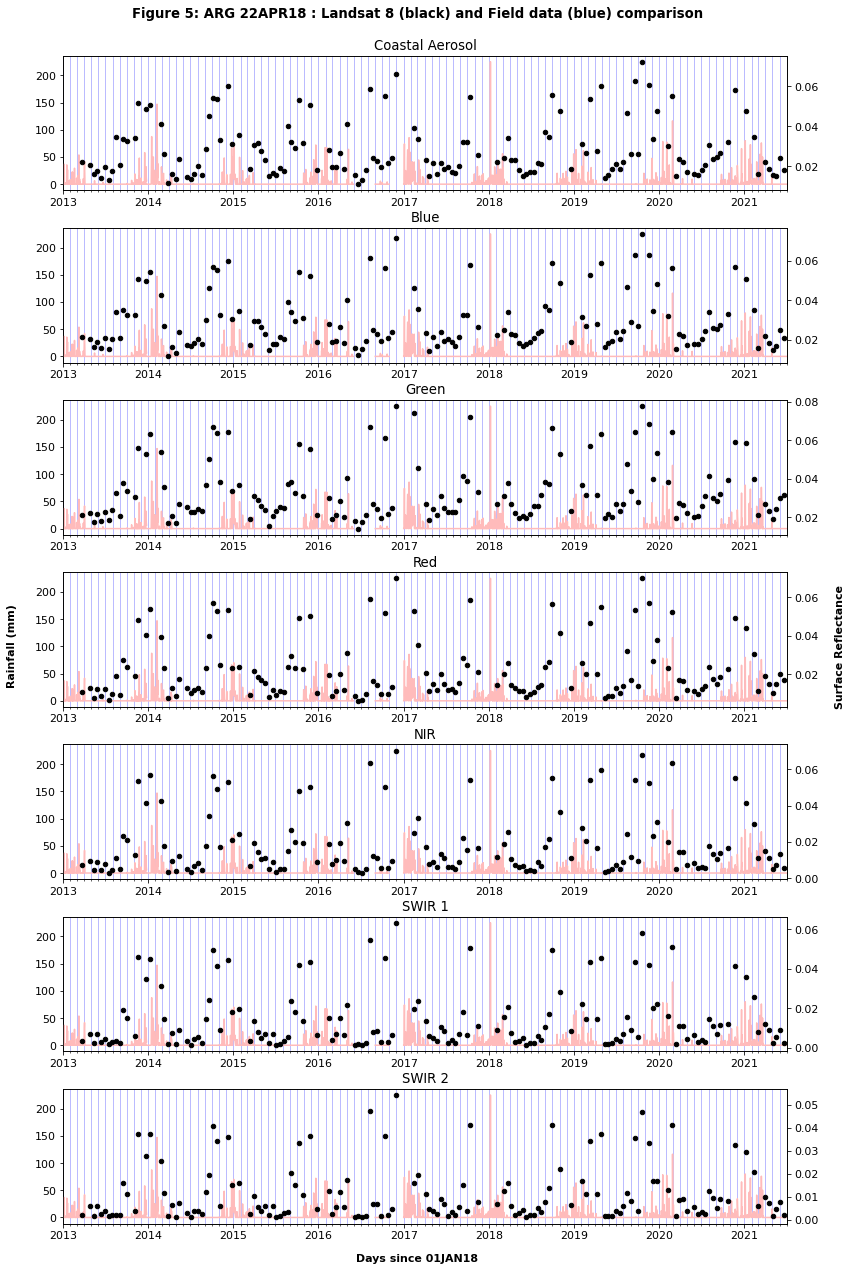

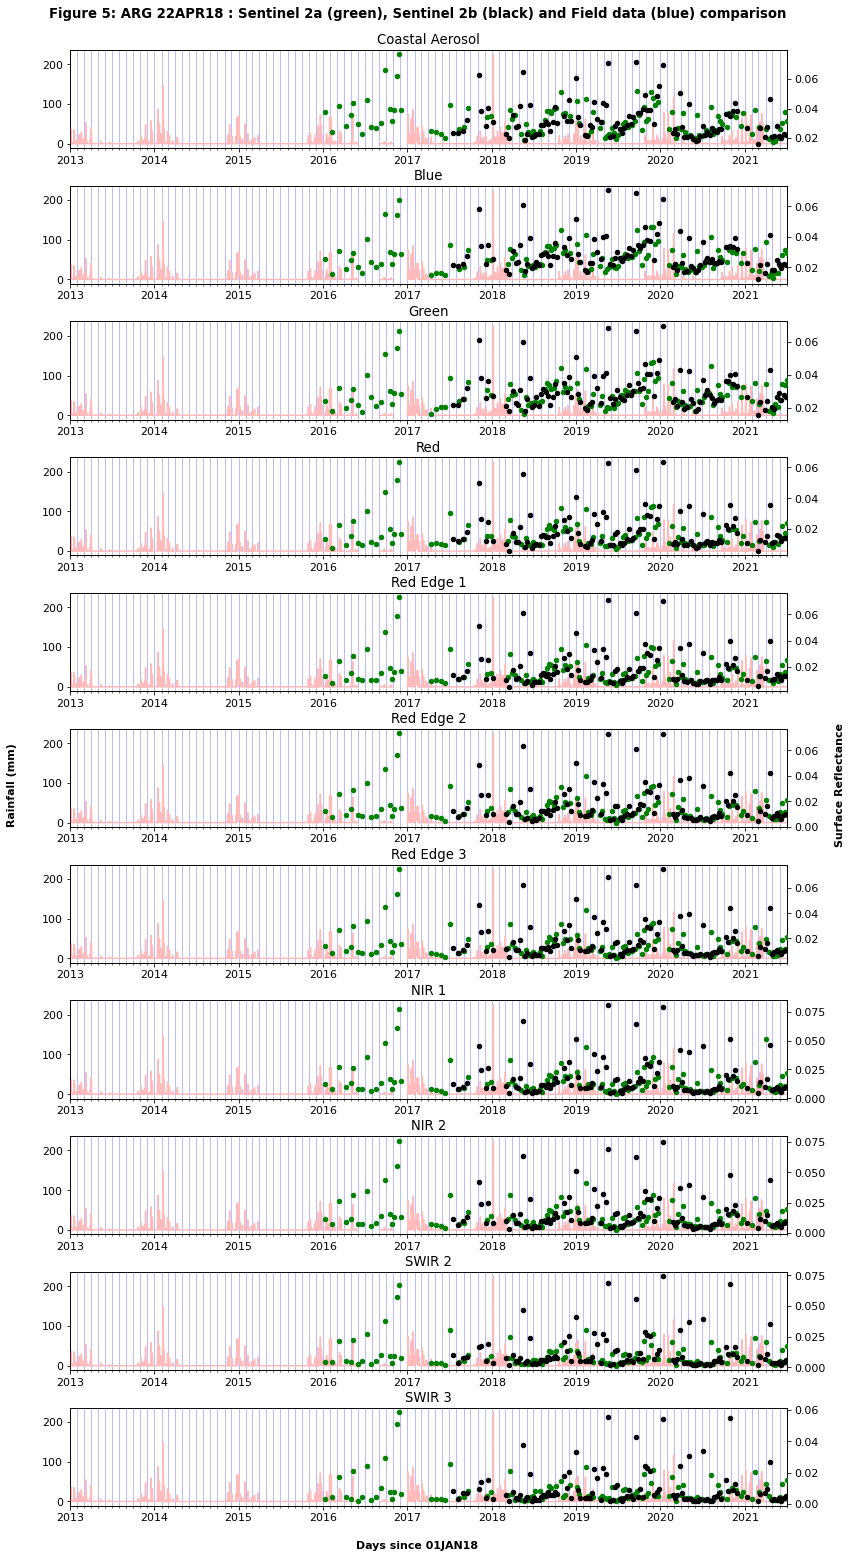

In [23]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

## How long did this notebook take to run?

In [24]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:18:25 (h:m:s) to run


In [25]:
ls8_array

<xarray.Dataset>
Dimensions:                     (time: 190, x: 6, y: 5)
Coordinates:
  * time                        (time) datetime64[ns] 2013-03-23T01:26:18.562...
  * y                           (y) float64 -1.717e+06 -1.717e+06 ... -1.717e+06
  * x                           (x) float64 -3.473e+05 -3.472e+05 ... -3.471e+05
    spatial_ref                 int32 3577
Data variables:
    nbar_coastal_aerosol        (time, y, x) int16 219 222 220 ... 172 175 175
    nbar_blue                   (time, y, x) int16 213 215 215 ... 204 202 206
    nbar_green                  (time, y, x) int16 214 212 210 ... 312 306 306
    nbar_red                    (time, y, x) int16 106 105 102 ... 166 161 160
    nbar_nir                    (time, y, x) int16 73 73 74 72 ... 58 57 57 57
    nbar_swir_1                 (time, y, x) int16 33 32 34 34 ... 24 23 26 25
    nbar_swir_2                 (time, y, x) int16 23 22 23 23 ... 20 23 19 19
    nbar_panchromatic           (time, y, x) int16 142 140 141 ... 206 208 205
    nbart_coastal_aerosol       (time, y, x) int16 219 222 220 ... 172 175 175
    nbart_blue                  (time, y, x) int16 213 215 215 ... 204 202 206
    nbart_green                 (time, y, x) int16 214 212 210 ... 312 306 306
    nbart_red                   (time, y, x) int16 106 105 102 ... 166 161 160
    nbart_nir                   (time, y, x) int16 73 73 74 72 ... 58 57 57 57
    nbart_swir_1                (time, y, x) int16 33 32 34 34 ... 24 23 26 25
    nbart_swir_2                (time, y, x) int16 23 22 23 23 ... 20 23 19 19
    nbart_panchromatic          (time, y, x) int16 142 140 141 ... 206 208 205
    oa_fmask                    (time, y, x) uint8 5 5 5 5 5 5 5 ... 5 5 5 5 5 5
    oa_nbar_contiguity          (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_nbart_contiguity         (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_azimuthal_exiting        (time, y, x) float32 98.536964 ... -81.44552
    oa_azimuthal_incident       (time, y, x) float32 63.93565 ... 36.400097
    oa_combined_terrain_shadow  (time, y, x) uint8 1 1 1 1 1 1 1 ... 1 1 1 1 1 1
    oa_exiting_angle            (time, y, x) float32 5.07776 ... 5.401106
    oa_incident_angle           (time, y, x) float32 35.32695 ... 48.64956
    oa_relative_azimuth         (time, y, x) float32 34.601315 ... 242.15439
    oa_relative_slope           (time, y, x) float32 -34.601315 ... 117.84562
    oa_satellite_azimuth        (time, y, x) float32 98.536964 ... 278.55447
    oa_satellite_view           (time, y, x) float32 5.07776 ... 5.401106
    oa_solar_azimuth            (time, y, x) float32 63.93565 ... 36.400097
    oa_solar_zenith             (time, y, x) float32 35.32695 ... 48.64956
    oa_time_delta               (time, y, x) float32 4.683684 ... 1.7759082
Attributes:
    crs:           EPSG:3577
    grid_mapping:  spatial_ref